In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
np.random.seed(12345)
def makeline(r, theta, tmin=-1, tmax=1, n=50, noise=0.01):
    #     r=0.5
    #     theta = 30*np.pi/180
    r0 = r*np.array([np.cos(theta), np.sin(theta)])
    rt = np.array([np.cos(theta+np.pi/2), np.sin(theta+np.pi/2)])

    xy = np.array([r0 + rt*t for t in np.linspace(tmin, tmax, n)])
    xy = xy + np.random.randn(n, 2)*noise
    return xy
#uncomment if you wanna cheat
xy1 = makeline(0.5, 30*np.pi/180)
#plt.plot(xy1[:,0], xy1[:,1], '.')
xy2 = makeline(0.7, -20*np.pi/180)
#plt.plot(xy2[:,0], xy2[:,1], '.')
xy3 = makeline(0, -20*np.pi/180)
#plt.plot(xy3[:,0], xy3[:,1], '.')
xy4 = makeline(0, 30*np.pi/180)
#plt.plot(xy4[:,0], xy4[:,1], '.')

data = np.vstack([xy1, xy2, xy3, xy4])
np.random.shuffle(data)


# Hough Transform(Line Version)

Can you find equation of the lines in this pic(programatically)???

Can you find the corners?

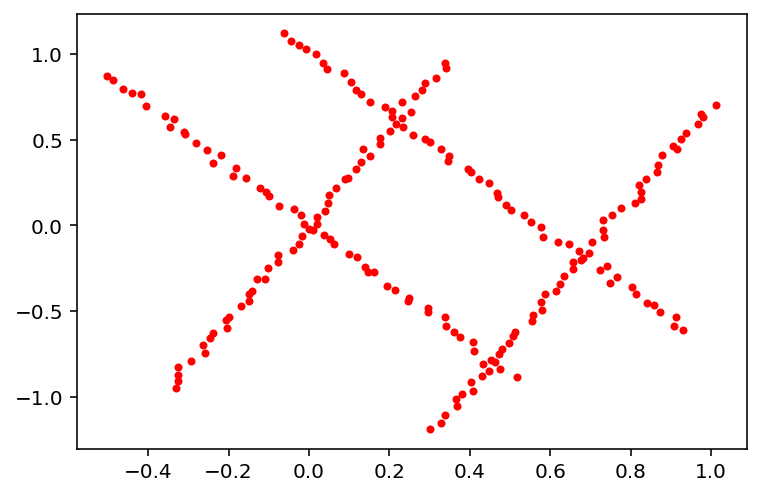

In [3]:
plt.plot(data[:, 0], data[:, 1], '.r')

## Convince your self that a line can be parametrize by $r$ and $\theta$. Write a parametric equation for the line.

## Draw a line with $r=2$, $\theta=30\deg$

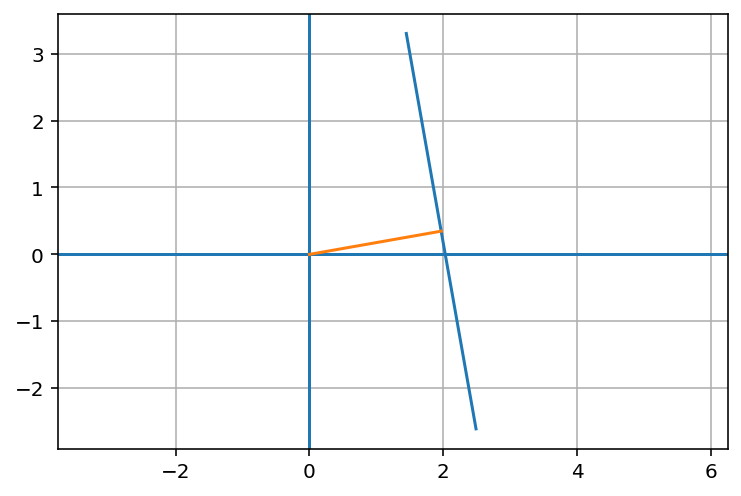

In [11]:
ts = np.linspace(-3,3,100)

r = 2
theta = np.deg2rad(10)

xs = r*np.cos(theta) - np.sin(theta)*ts
ys = r*np.sin(theta) + np.cos(theta)*ts

plt.plot(xs, ys)
plt.axis('equal')

plt.axhline(0)
plt.axvline(0)
plt.grid()

x0 = r*np.cos(theta)
y0 = r*np.sin(theta)

plt.plot([0, x0], [0, y0])

## For a point (x,y) what is the set of $r$ and $\theta$ for line that passes through point x and y.

[0.26354876 0.75175445]


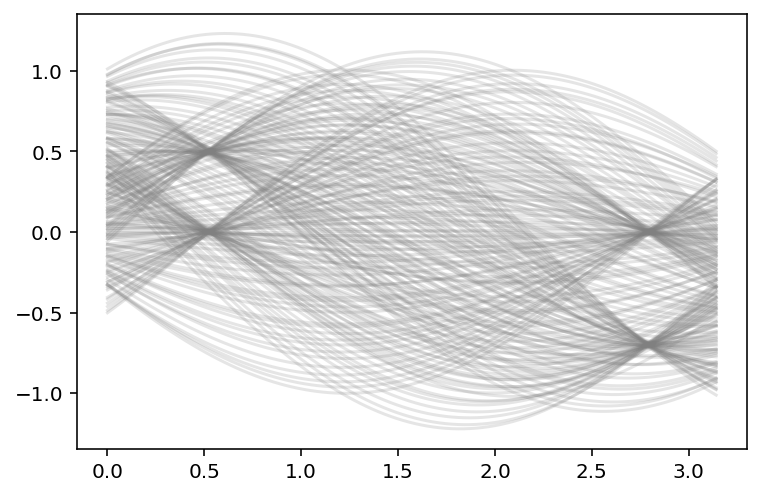

In [17]:
# all the line that pass through data[0]
print(data[0])
for d in data:
    thetas = np.linspace(0, np.pi, 100)
    rs = [d @ (np.cos(t), np.sin(t)) for t in thetas]

    plt.plot(thetas, rs, color='gray', alpha=0.2)




## Accumulate the $r$ and $\theta$ for all the data points and make a 2d histogram.

In [30]:
from dataclasses import dataclass

n_theta, n_r = 500, 500
thetas = np.linspace(0, np.pi, n_theta)
rs = np.linspace(-2, 2, n_r)

votes = np.zeros((n_r, n_theta))

for i_theta, (theta_left, theta_right) in enumerate(zip(thetas[:-1], thetas[1:])):
    for d in data:
        theta_mid = (theta_left + theta_right)/2
        r = d @ np.array([np.cos(theta_mid), np.sin(theta_mid)])
        i_r = np.searchsorted(rs, r)
        #print(i_r)
        votes[i_r, i_theta] += 1

[(-0.6933867735470942, 2.7953249262402164), (0.00400801603206391, 0.5162537025939139), (0.00400801603206391, 0.5225494794548152), (0.5090180360721441, 0.5162537025939139)]


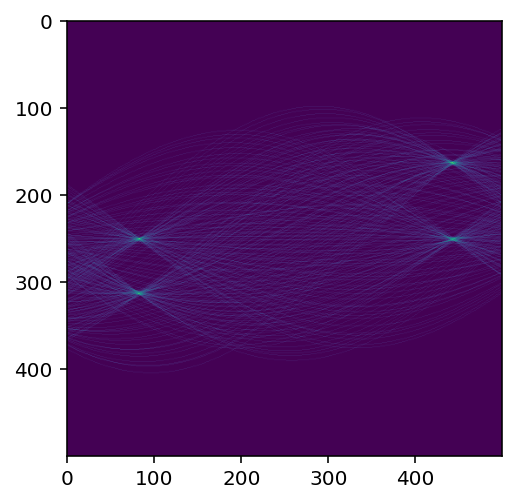

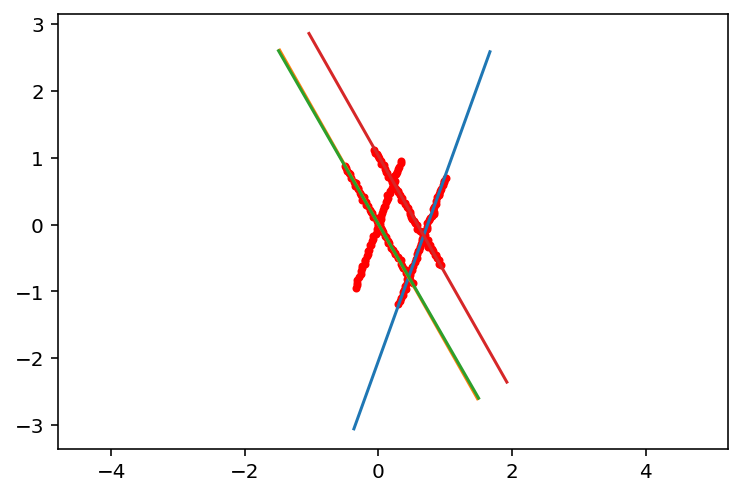

In [48]:
plt.imshow(votes)

threshold = 16

good_r_thetas = []

def plot_line(r, theta, t_min=-2, tmax=2):
    xs = r*np.cos(theta) - np.sin(theta)*ts
    ys = r*np.sin(theta) + np.cos(theta)*ts

    plt.plot(xs, ys)
    plt.axis('equal')

for i_r, r in enumerate(rs):
    for i_theta, theta in enumerate(thetas):
        if votes[i_r, i_theta] > threshold:
            good_r_thetas.append((r, theta))

plt.figure()
print(good_r_thetas)


plt.plot(data[:, 0], data[:, 1], '.r')
for r,theta in good_r_thetas:
    plot_line(r, theta)


    

## Find the peaks. Easiest way is to just find x>threshold and x is the max within certain window.

In [ ]:
np.fin

## Draw the lines given the peak parameter

# Hough Transform Circle Version.

We can use voting mechanism to actually find any decently-defined geometry

In [4]:
np.random.seed(999)
def make_circle(x, y, r, noise=0.01):
    thetas = np.linspace(0, 2*np.pi, 100)
    ret = [np.array([x, y]) + (r+noise*np.random.randn())*np.array([np.cos(t), np.sin(t)]) for t in thetas]
    return np.array(ret)

c1 = make_circle(1, 1.5, 0.3)
#plt.plot(c1[:,0], c1[:,1], '.')
c2 = make_circle(2, 1, 0.3)
#plt.plot(c2[:,0], c2[:,1], '.')
c3 = make_circle(1, 0.5, 0.1)
#plt.plot(c3[:,0], c3[:,1], '.')
#plt.gca().set_aspect(1)

data = np.vstack([c1, c2, c3])
np.random.shuffle(data)

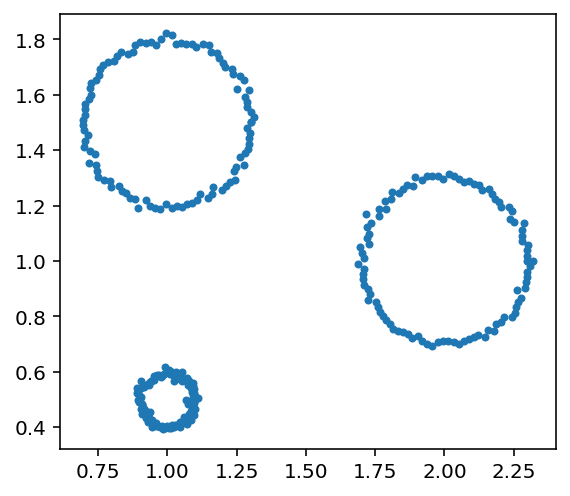

In [5]:
plt.plot(data[:,0], data[:, 1], '.')
plt.gca().set_aspect(1)

## How do we parametrize a circle?

## Given a point x,y what are the set of the parameter for the circle that pass through it.

## Accumulate

## Find Peak

## Draw the Circle... We can also use this to count the circle.